In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from unidecode import unidecode
from branca.colormap import linear


IMPORTACIÓN CSV PISOS BCN

In [12]:
bcn = pd.read_csv('../data/barcelona_sales.csv',index_col=False)
bcn.columns


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3676\2496637715.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  bcn = pd.read_csv('../data/barcelona_sales.csv',index_col=False)


Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_DIAGONAL',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

DROP COLUMNS INNECESARIAS

In [3]:
bcn = bcn.drop(columns=[
    'CONSTRUCTIONYEAR',
    'PERIOD',
    'FLOORCLEAN',
    'CADMAXBUILDINGFLOOR',
    'CADDWELLINGCOUNT', 
    'CADASTRALQUALITYID', 
    'BUILTTYPEID_1', 
    'BUILTTYPEID_2', 
    'BUILTTYPEID_3', 
    'FLATLOCATIONID', 
    'ISPARKINGSPACEINCLUDEDINPRICE',
    'PARKINGSPACEPRICE',
    'AMENITYID',
    'ISDUPLEX', 
    'ISSTUDIO', 
    'ISINTOPFLOOR',
    'geometry'])

In [4]:
bcn

,ASSETID,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,CADCONSTRUCTIONYEAR,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE
0,A11898131848556022319,323000.0,3845.238095,84,4,1,1,1,1,0,...,0,0,0,0,1972,1.876290,0.354004,1.475264,2.149566,41.380027
1,A18099432772155664747,217000.0,2583.333333,84,3,2,0,1,1,0,...,0,0,0,1,1930,2.118595,0.284372,1.194261,2.145689,41.381632
2,A2003099089407882787,114000.0,1407.407407,81,2,1,0,1,1,0,...,0,0,0,0,1940,4.127099,0.261574,2.504982,2.173891,41.423929
3,A1010373782315301134,378000.0,4784.810127,79,2,1,0,1,0,0,...,0,0,0,0,2016,2.238113,0.158527,0.795605,2.143379,41.384923
4,A12978912200216838006,434000.0,3909.909910,111,4,2,1,1,1,0,...,0,0,0,0,1970,2.333066,0.101568,1.200265,2.143230,41.381076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61481,A8236213040595627286,173000.0,3145.454545,55,2,1,0,1,0,0,...,0,0,0,0,1973,3.667881,0.518494,1.715963,2.202449,41.409206
61482,A7326977391536869553,417000.0,6415.384615,65,1,1,1,1,1,0,...,1,1,0,1,2004,4.260692,0.436749,2.572506,2.214316,41.405984
61483,A4195884399546751335,447000.0,5587.500000,80,1,1,1,1,1,1,...,1,0,0,0,2000,4.189815,0.336155,2.477634,2.213108,41.406273
61484,A8911187592173062363,281000.0,4929.824561,57,1,1,0,1,1,1,...,1,0,0,0,2016,3.830079,0.151466,1.983796,2.206612,41.407730


DROP DUPLICATED ASSETS

In [5]:
# Eliminación de duplicados, basado en el ID
bcn = bcn.drop_duplicates(subset='ASSETID')

SELECTION OF ASSETS FROM 1900 ONWARDS

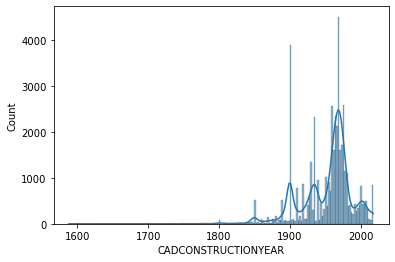

In [6]:
# como la mayoría de pisos en el mercado fueron construidos a partir de 1900, eliminamos los activos anteriores

sns.histplot(data=bcn, x='CADCONSTRUCTIONYEAR', kde= True)

In [7]:
# assets prior to 1900 are discarded
bcn = bcn[bcn.CADCONSTRUCTIONYEAR >= 1900]

FREQUENCY DISTRIBUTION OF ASSETS IN TERMS OF PRICE

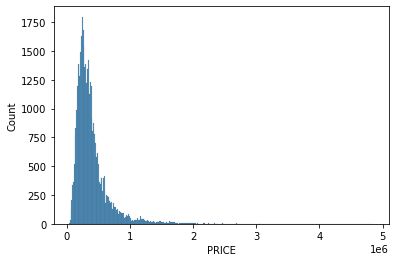

In [8]:
# most assets are priced below 1.000.000€
sns.histplot(data=bcn, x='PRICE')

PRICES FOR EACH DEACADE

In [9]:
# creation of a new column 'DECADE' to categorize each asset
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1900,1909), 'DECADE'] = 1900
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1910,1919), 'DECADE'] = 1910
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1920,1929), 'DECADE'] = 1920
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1930,1939), 'DECADE'] = 1930
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1940,1949), 'DECADE'] = 1940
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1950,1959), 'DECADE'] = 1950
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1960,1969), 'DECADE'] = 1960
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1970,1979), 'DECADE'] = 1970
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1980,1989), 'DECADE'] = 1980
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(1990,1999), 'DECADE'] = 1990
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(2000,2009), 'DECADE'] = 2000
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(2010,2019), 'DECADE'] = 2010
bcn.loc[bcn['CADCONSTRUCTIONYEAR'].between(2020,2023), 'DECADE'] = 2020

bcn

,ASSETID,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,CADCONSTRUCTIONYEAR,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE,DECADE
0,A11898131848556022319,323000.0,3845.238095,84,4,1,1,1,1,0,...,0,0,0,1972,1.876290,0.354004,1.475264,2.149566,41.380027,1970.0
1,A18099432772155664747,217000.0,2583.333333,84,3,2,0,1,1,0,...,0,0,1,1930,2.118595,0.284372,1.194261,2.145689,41.381632,1930.0
2,A2003099089407882787,114000.0,1407.407407,81,2,1,0,1,1,0,...,0,0,0,1940,4.127099,0.261574,2.504982,2.173891,41.423929,1940.0
3,A1010373782315301134,378000.0,4784.810127,79,2,1,0,1,0,0,...,0,0,0,2016,2.238113,0.158527,0.795605,2.143379,41.384923,2010.0
4,A12978912200216838006,434000.0,3909.909910,111,4,2,1,1,1,0,...,0,0,0,1970,2.333066,0.101568,1.200265,2.143230,41.381076,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61455,A3135249721223751044,368000.0,3066.666667,120,5,2,0,1,1,0,...,0,0,0,1970,2.980968,0.033919,1.612679,2.137634,41.375745,1970.0
61458,A16393962352712028144,183000.0,2033.333333,90,2,1,1,1,0,0,...,0,0,0,1946,2.596824,0.345726,2.227390,2.146083,41.372098,1940.0
61465,A15062190487074458183,330000.0,3793.103448,87,3,2,1,1,1,0,...,0,0,0,1973,3.770038,0.333236,2.420584,2.148946,41.416913,1970.0
61466,A17940917657541505959,240000.0,3000.000000,80,2,1,1,1,1,0,...,1,0,0,1973,4.774034,0.052769,3.418272,2.160535,41.429258,1970.0


In [10]:
# as the 'DECADE' column obtained above is in str format, we must convert it into a date format 
bcn['DECADE'] = pd.to_datetime(bcn['DECADE'], format='%Y')
bcn['DECADE'] = bcn['DECADE'].dt.year

bcn

,ASSETID,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,CADCONSTRUCTIONYEAR,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE,DECADE
0,A11898131848556022319,323000.0,3845.238095,84,4,1,1,1,1,0,...,0,0,0,1972,1.876290,0.354004,1.475264,2.149566,41.380027,1970
1,A18099432772155664747,217000.0,2583.333333,84,3,2,0,1,1,0,...,0,0,1,1930,2.118595,0.284372,1.194261,2.145689,41.381632,1930
2,A2003099089407882787,114000.0,1407.407407,81,2,1,0,1,1,0,...,0,0,0,1940,4.127099,0.261574,2.504982,2.173891,41.423929,1940
3,A1010373782315301134,378000.0,4784.810127,79,2,1,0,1,0,0,...,0,0,0,2016,2.238113,0.158527,0.795605,2.143379,41.384923,2010
4,A12978912200216838006,434000.0,3909.909910,111,4,2,1,1,1,0,...,0,0,0,1970,2.333066,0.101568,1.200265,2.143230,41.381076,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61455,A3135249721223751044,368000.0,3066.666667,120,5,2,0,1,1,0,...,0,0,0,1970,2.980968,0.033919,1.612679,2.137634,41.375745,1970
61458,A16393962352712028144,183000.0,2033.333333,90,2,1,1,1,0,0,...,0,0,0,1946,2.596824,0.345726,2.227390,2.146083,41.372098,1940
61465,A15062190487074458183,330000.0,3793.103448,87,3,2,1,1,1,0,...,0,0,0,1973,3.770038,0.333236,2.420584,2.148946,41.416913,1970
61466,A17940917657541505959,240000.0,3000.000000,80,2,1,1,1,1,0,...,1,0,0,1973,4.774034,0.052769,3.418272,2.160535,41.429258,1970


GRAPH - AVERAGE FOR DEACDE

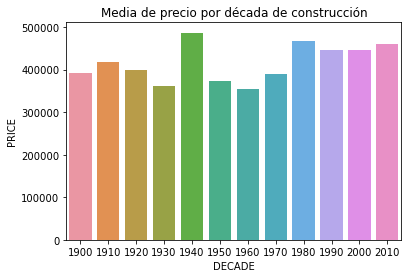

In [11]:
# medias de precio por año
bcn_means = bcn.groupby('DECADE')['PRICE'].mean().reset_index()

# gráfico de barras
sns.barplot(x='DECADE', y='PRICE', data=bcn_means, order=bcn_means['DECADE'])
plt.title('Media de precio por década de construcción')
plt.show()

GRAPH - MEDIAN FOR DEACDE

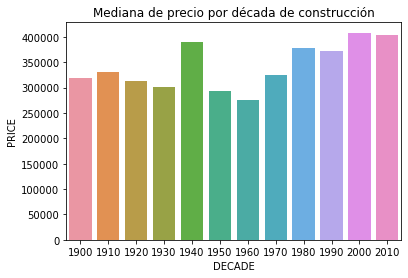

In [12]:
# medianas de precio por año
bcn_median = bcn.groupby('DECADE')['PRICE'].median().reset_index()

# gráfico de barras
sns.barplot(x='DECADE', y='PRICE', data=bcn_median, order=bcn_median['DECADE'])
plt.title('Mediana de precio por década de construcción')
plt.show()

!!!! AFTER THE 2 GRAPHS WE STUMBLED UPON THE FACT THAT THE AVG PRICE IS THE HIGHEST IN 1940, BUT THE MEDIAN PRICE IS HIGHER IN ASSETS FROM AFTER THE YEAR 2000. MAYBE OUTLIERS?? LET'S SEE WITH A BOXPLOT FOR THE AVG PRICE

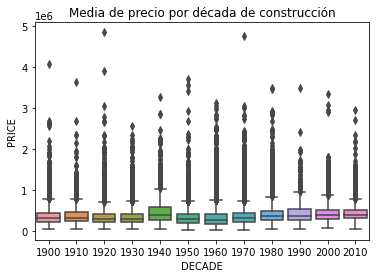

In [13]:
# after the boxplot, we can see the differences are not driven by outliers.
sns.boxplot(x='DECADE', y='PRICE', data=bcn, order=bcn_means['DECADE'])
plt.title('Media de precio por década de construcción')
plt.show()

GRAPH - AVERAGE M2 OF ASSET PER DECADE

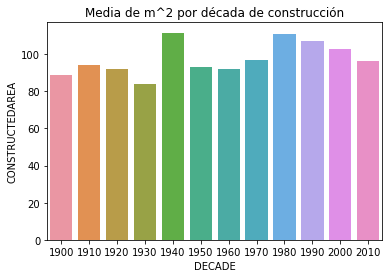

In [14]:
# medias de precio por año
bcn_means_m2 = bcn.groupby('DECADE')['CONSTRUCTEDAREA'].mean().reset_index()

# gráfico de barras
sns.barplot(x='DECADE', y='CONSTRUCTEDAREA', data=bcn_means_m2, order=bcn_means_m2['DECADE'])
plt.title('Media de m^2 por década de construcción')
plt.show()

GRAPH - MEDIAN M2 OF ASSET PER DECADE

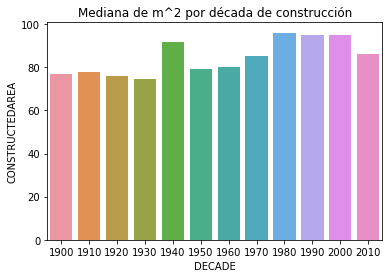

In [15]:
# medias de precio por año
bcn_median_m2 = bcn.groupby('DECADE')['CONSTRUCTEDAREA'].median().reset_index()

# gráfico de barras
sns.barplot(x='DECADE', y='CONSTRUCTEDAREA', data=bcn_median_m2, order=bcn_median_m2['DECADE'])
plt.title('Mediana de m^2 por década de construcción')
plt.show()

CORRELATION MATRIX - FOCUS ON DISTANCES

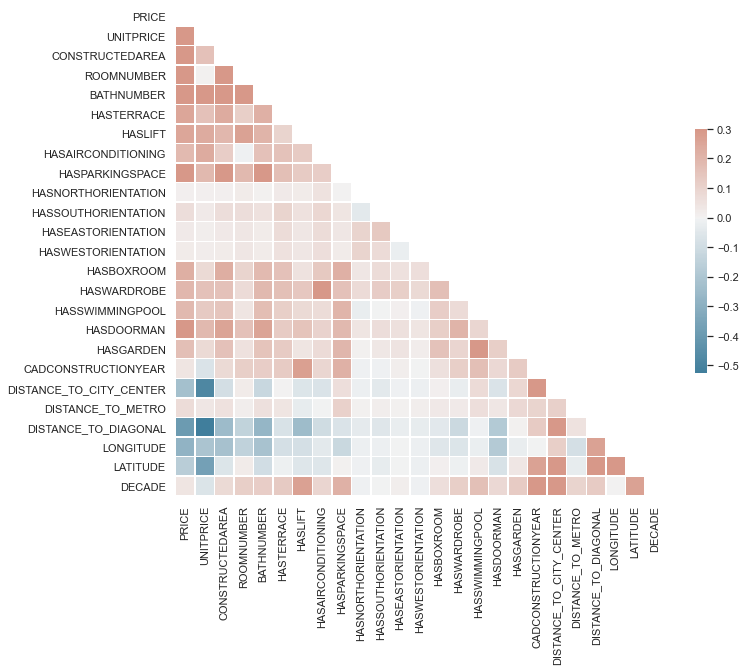

In [16]:
sns.set_theme(style='white')

bcn_corr = bcn.corr()

# generate mask for the upper triangle
mask = np.triu(np.ones_like(bcn_corr,dtype=bool))

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# custom diverging map
cmap = sns.diverging_palette(230,20, as_cmap=True)

# heatmap with mask and aspect ratio
sns.heatmap(bcn_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={'shrink': .5})


CONVERT DF TO GEODATAFRAME

In [17]:
# Creación de la columna 'geometry' a partir de la longitud y la latitud
bcn_gdf = gpd.GeoDataFrame(
    bcn, geometry=gpd.points_from_xy(bcn.LONGITUDE, bcn.LATITUDE))

In [18]:
# Normalizamos y pasamos a minúsculas usando unidecode

# bcn_poly = pd.read_csv('Barcelona_polygons.csv')

# bcn_poly['LOCATIONNAME'] = bcn_poly['LOCATIONNAME'].astype(str).apply(lambda x: unidecode(x).lower())

# bcn_poly.to_csv('bcn_poly.csv', index=False)

bcn_poly_normalized = gpd.read_file('../data/bcn_poly.csv')
bcn_poly_normalized


,LOCATIONID,LOCATIONNAME,WKT,ZONELEVELID,geometry
0,0-EU-ES-08-13-001-019-08-008,porta,"MULTIPOLYGON(((2.174593 41.438354,2.17377 41.4...",8,"MULTIPOLYGON (((2.17459 41.43835, 2.17377 41.4..."
1,0-EU-ES-08-13-001-019-09-001,la trinitat vella,"MULTIPOLYGON(((2.190409 41.455189,2.189046 41....",8,"MULTIPOLYGON (((2.19041 41.45519, 2.18905 41.4..."
2,0-EU-ES-08-13-001-019-09-003,baro de viver,"MULTIPOLYGON(((2.20145 41.449038,2.198839 41.4...",8,"MULTIPOLYGON (((2.20145 41.44904, 2.19884 41.4..."
3,0-EU-ES-08-13-001-019-10-010,sant marti de provencals,"MULTIPOLYGON(((2.192434 41.414519,2.193101 41....",8,"MULTIPOLYGON (((2.19243 41.41452, 2.19310 41.4..."
4,0-EU-ES-08-13-001-019-03-005,la marina del port,"MULTIPOLYGON(((2.133836 41.353092,2.135538 41....",8,"MULTIPOLYGON (((2.13384 41.35309, 2.13554 41.3..."
...,...,...,...,...,...
64,0-EU-ES-08-13-001-019-07-005,el guinardo,"MULTIPOLYGON(((2.168985 41.421274,2.168976 41....",8,"MULTIPOLYGON (((2.16899 41.42127, 2.16898 41.4..."
65,0-EU-ES-08-13-001-019-07-008,la font d'en fargues,"MULTIPOLYGON(((2.15837 41.4253,2.158562 41.424...",8,"MULTIPOLYGON (((2.15837 41.42530, 2.15856 41.4..."
66,0-EU-ES-08-13-001-019-07-009,can baro,"MULTIPOLYGON(((2.158646 41.416809,2.158535 41....",8,"MULTIPOLYGON (((2.15865 41.41681, 2.15854 41.4..."
67,0-EU-ES-08-13-001-019-03-007,el poble sec - parc de montjuic,"MULTIPOLYGON(((2.154278 41.375001,2.152606 41....",8,"MULTIPOLYGON (((2.15428 41.37500, 2.15261 41.3..."


MERGING ASSET LIST & MULTYPOLIGON DATA (AREAS OF THE CITY)

In [19]:
# mediante un merge, asignamos la variable categórica LOCATIONNAME (barrio) a la lista de pisos y la definimos como 'bcn_with_barrios'
bcn_with_barrios = bcn_gdf.sjoin(bcn_poly_normalized,how='inner')

In [20]:
bcn_with_barrios

,ASSETID,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE,DECADE,geometry,index_right,LOCATIONID,LOCATIONNAME,WKT,ZONELEVELID
0,A11898131848556022319,323000.0,3845.238095,84,4,1,1,1,1,0,...,1.475264,2.149566,41.380027,1970,POINT (2.14957 41.38003),54,0-EU-ES-08-13-001-019-02-001,la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",8
1,A18099432772155664747,217000.0,2583.333333,84,3,2,0,1,1,0,...,1.194261,2.145689,41.381632,1930,POINT (2.14569 41.38163),54,0-EU-ES-08-13-001-019-02-001,la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",8
3,A1010373782315301134,378000.0,4784.810127,79,2,1,0,1,0,0,...,0.795605,2.143379,41.384923,2010,POINT (2.14338 41.38492),54,0-EU-ES-08-13-001-019-02-001,la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",8
4,A12978912200216838006,434000.0,3909.909910,111,4,2,1,1,1,0,...,1.200265,2.143230,41.381076,1970,POINT (2.14323 41.38108),54,0-EU-ES-08-13-001-019-02-001,la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",8
5,A10446606541222668172,298000.0,3204.301075,93,2,2,1,1,1,0,...,0.738334,2.146500,41.386295,1990,POINT (2.14650 41.38630),54,0-EU-ES-08-13-001-019-02-001,la nova esquerra de l'eixample,"MULTIPOLYGON(((2.143714 41.390516,2.143394 41....",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60640,A14286289215677538043,557000.0,6120.879121,91,2,2,1,1,1,1,...,2.586587,2.214319,41.406767,2000,POINT (2.21432 41.40677),17,0-EU-ES-08-13-001-019-10-009,diagonal mar i el front maritim del poblenou,"MULTIPOLYGON(((2.22602 41.406091,2.219054 41.4...",8
60642,A1908147673930273885,306000.0,3923.076923,78,3,1,0,1,0,0,...,2.246883,2.209269,41.409256,1930,POINT (2.20927 41.40926),17,0-EU-ES-08-13-001-019-10-009,diagonal mar i el front maritim del poblenou,"MULTIPOLYGON(((2.22602 41.406091,2.219054 41.4...",8
60646,A128672154222399808,568000.0,6241.758242,91,2,2,1,1,1,1,...,2.539176,2.213798,41.406530,2000,POINT (2.21380 41.40653),17,0-EU-ES-08-13-001-019-10-009,diagonal mar i el front maritim del poblenou,"MULTIPOLYGON(((2.22602 41.406091,2.219054 41.4...",8
60647,A15404846553463429942,224000.0,3862.068966,58,2,1,0,1,0,0,...,2.864299,2.216718,41.409989,2000,POINT (2.21672 41.40999),17,0-EU-ES-08-13-001-019-10-009,diagonal mar i el front maritim del poblenou,"MULTIPOLYGON(((2.22602 41.406091,2.219054 41.4...",8


In [21]:
# dataframe con la media de los precios por barrio
barrios_mean_price = bcn_with_barrios.groupby('LOCATIONNAME')['PRICE'].mean().reset_index()
barrios_mean_price['PRICE'] = barrios_mean_price['PRICE'].astype(int)
barrios_mean_price

,LOCATIONNAME,PRICE
0,baro de viver,151000
1,can baro,257285
2,can peguera - el turo de la peira,163804
3,canyelles,188750
4,ciutat meridiana - torre baro - vallbona,111096
...,...,...
64,vallvidrera - el tibidabo i les planes,394666
65,verdun,162126
66,vila de gracia,424440
67,vilapicina i la torre llobeta,246659


In [22]:
# hago un join para agregar la columna de average price al df con los barrios

bcn_poly_normalized = bcn_poly_normalized.set_index('LOCATIONNAME')
barrios_mean_price = barrios_mean_price.set_index('LOCATIONNAME')

bcn_poly_normalized = bcn_poly_normalized.join(barrios_mean_price['PRICE'])
bcn_poly_normalized = bcn_poly_normalized.reset_index()


In [23]:
bcn_poly_normalized.nlargest(1,'PRICE')['LOCATIONNAME'].values[0]

'pedralbes'

In [24]:
bcn_poly_normalized

,LOCATIONNAME,LOCATIONID,WKT,ZONELEVELID,geometry,PRICE
0,porta,0-EU-ES-08-13-001-019-08-008,"MULTIPOLYGON(((2.174593 41.438354,2.17377 41.4...",8,"MULTIPOLYGON (((2.17459 41.43835, 2.17377 41.4...",221015
1,la trinitat vella,0-EU-ES-08-13-001-019-09-001,"MULTIPOLYGON(((2.190409 41.455189,2.189046 41....",8,"MULTIPOLYGON (((2.19041 41.45519, 2.18905 41.4...",150381
2,baro de viver,0-EU-ES-08-13-001-019-09-003,"MULTIPOLYGON(((2.20145 41.449038,2.198839 41.4...",8,"MULTIPOLYGON (((2.20145 41.44904, 2.19884 41.4...",151000
3,sant marti de provencals,0-EU-ES-08-13-001-019-10-010,"MULTIPOLYGON(((2.192434 41.414519,2.193101 41....",8,"MULTIPOLYGON (((2.19243 41.41452, 2.19310 41.4...",238298
4,la marina del port,0-EU-ES-08-13-001-019-03-005,"MULTIPOLYGON(((2.133836 41.353092,2.135538 41....",8,"MULTIPOLYGON (((2.13384 41.35309, 2.13554 41.3...",244211
...,...,...,...,...,...,...
64,el guinardo,0-EU-ES-08-13-001-019-07-005,"MULTIPOLYGON(((2.168985 41.421274,2.168976 41....",8,"MULTIPOLYGON (((2.16899 41.42127, 2.16898 41.4...",283296
65,la font d'en fargues,0-EU-ES-08-13-001-019-07-008,"MULTIPOLYGON(((2.15837 41.4253,2.158562 41.424...",8,"MULTIPOLYGON (((2.15837 41.42530, 2.15856 41.4...",420887
66,can baro,0-EU-ES-08-13-001-019-07-009,"MULTIPOLYGON(((2.158646 41.416809,2.158535 41....",8,"MULTIPOLYGON (((2.15865 41.41681, 2.15854 41.4...",257285
67,el poble sec - parc de montjuic,0-EU-ES-08-13-001-019-03-007,"MULTIPOLYGON(((2.154278 41.375001,2.152606 41....",8,"MULTIPOLYGON (((2.15428 41.37500, 2.15261 41.3...",292066


GRAPH - HEAT MAP BARCELONA

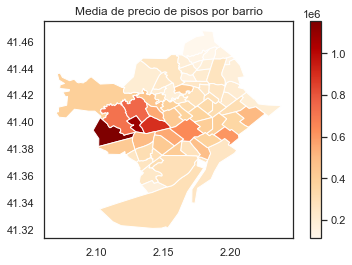

In [25]:
# preliminary map using matplot
bcn_poly_normalized.plot(column='PRICE', cmap='OrRd', legend=True)
plt.title('Media de precio de pisos por barrio')
plt.show()


In [26]:
# objeto GeoJSON
bcn_poly_normalized = bcn_poly_normalized.set_crs(epsg=4326)
bcn_geojson = bcn_poly_normalized.to_crs(epsg='4326').to_json()

# objeto colormap para asignar un color diferente a cada área
colormap = linear.YlOrRd_09.scale(
    bcn_poly_normalized['PRICE'].min(),
    bcn_poly_normalized['PRICE'].max())

bcn_map = folium.Map(location=[41.385063, 2.173404], zoom_start=10)

# añado el objeto GeoJSON al mapa, con un color diferente a cada zona
folium.GeoJson(
    bcn_geojson,
    name='Media de precio de pisos por zona',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['PRICE']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8,
    },
    tooltip=folium.GeoJsonTooltip(fields=['LOCATIONNAME', 'PRICE'], aliases=['Zona', 'Precio'])
).add_to(bcn_map)


# agrego leyenda al mapa
folium.LayerControl().add_to(bcn_map)
colormap.caption = 'Precio medio de pisos por zona'
colormap.add_to(bcn_map)

bcn_map


In [27]:
#bcn_map.save('bcn_map.html')

In [28]:
# seleccción de los 10 barrios más caros
top10_bcn = bcn_poly_normalized.sort_values('PRICE',ascending=False).head(10)
top10_bcn


,LOCATIONNAME,LOCATIONID,WKT,ZONELEVELID,geometry,PRICE
6,pedralbes,0-EU-ES-08-13-001-019-04-003,"MULTIPOLYGON(((2.127388 41.388414,2.127975 41....",8,"MULTIPOLYGON (((2.12739 41.38841, 2.12798 41.3...",1156394
23,les tres torres,0-EU-ES-08-13-001-019-05-004,"MULTIPOLYGON(((2.128361 41.403804,2.124505 41....",8,"MULTIPOLYGON (((2.12836 41.40380, 2.12451 41.4...",1084325
35,sant gervasi - galvany,0-EU-ES-08-13-001-019-05-005,"MULTIPOLYGON(((2.141826 41.404052,2.141384 41....",8,"MULTIPOLYGON (((2.14183 41.40405, 2.14138 41.4...",896644
21,sant gervasi - la bonanova,0-EU-ES-08-13-001-019-05-003,"MULTIPOLYGON(((2.128921 41.417503,2.128866 41....",8,"MULTIPOLYGON (((2.12892 41.41750, 2.12887 41.4...",758317
22,sarria,0-EU-ES-08-13-001-019-05-002,"MULTIPOLYGON(((2.122911 41.400735,2.123161 41....",8,"MULTIPOLYGON (((2.12291 41.40073, 2.12316 41.4...",722846
57,la dreta de l'eixample,0-EU-ES-08-13-001-019-02-004,"MULTIPOLYGON(((2.179942 41.391071,2.180261 41....",8,"MULTIPOLYGON (((2.17994 41.39107, 2.18026 41.3...",646443
53,la vila olimpica del poblenou,0-EU-ES-08-13-001-019-10-006,"MULTIPOLYGON(((2.206214 41.390353,2.202735 41....",8,"MULTIPOLYGON (((2.20621 41.39035, 2.20274 41.3...",606120
55,l'antiga esquerra de l'eixample,0-EU-ES-08-13-001-019-02-002,"MULTIPOLYGON(((2.163419 41.385786,2.164095 41....",8,"MULTIPOLYGON (((2.16342 41.38579, 2.16410 41.3...",556060
47,el putxet i el farro,0-EU-ES-08-13-001-019-05-006,"MULTIPOLYGON(((2.137641 41.414172,2.137988 41....",8,"MULTIPOLYGON (((2.13764 41.41417, 2.13799 41.4...",554345
17,diagonal mar i el front maritim del poblenou,0-EU-ES-08-13-001-019-10-009,"MULTIPOLYGON(((2.22602 41.406091,2.219054 41.4...",8,"MULTIPOLYGON (((2.22602 41.40609, 2.21905 41.4...",506865


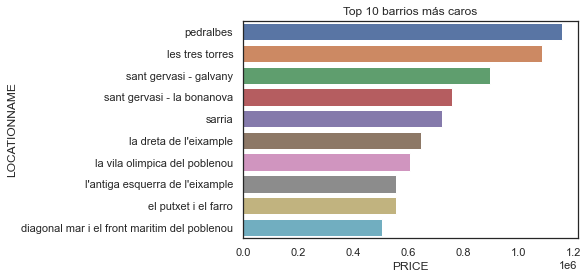

In [29]:
# grafico de los 10 barrios más caros
sns.barplot(x='PRICE', y='LOCATIONNAME', data=top10_bcn)
plt.title('Top 10 barrios más caros')
plt.show()